<a href="https://colab.research.google.com/github/chhavibhadana/Data-Science-Projects/blob/main/Netflix_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective
1. Find out the list of most popular and liked genre
2. Create Model that finds the best suited Movie for one user in every genre.
3. Find what Genre Movies have received the best and
worst ratings based on User Rating.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/CapstoneDataSet.csv')

In [3]:
movies

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
1,822109,5,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet
...,...,...,...,...,...
1048569,196625,4,241,Horror,North by NorthWest
1048570,138835,3,241,Horror,North by NorthWest
1048571,1400154,5,241,Horror,North by NorthWest
1048572,1018992,3,241,Horror,North by NorthWest


1. Finding the list of most popular and liked genres

In [4]:
f = ['count', 'mean']

genre_ranking = movies.groupby('Genre')['Rating'].agg(f)

In [5]:
genre_ranking = genre_ranking.sort_values(by = ['count', 'mean'], ascending = False)

In [6]:
genre_ranking

,count,mean
Genre,,
Historical,240327,3.817948
Animation,123898,3.581107
Educational,111976,3.898523
Mystery,100898,3.390731
Crime,97323,3.728872
Biography,88510,3.463439
Gang,54861,3.680611
War,43446,3.288243
RomCom,39629,3.383633


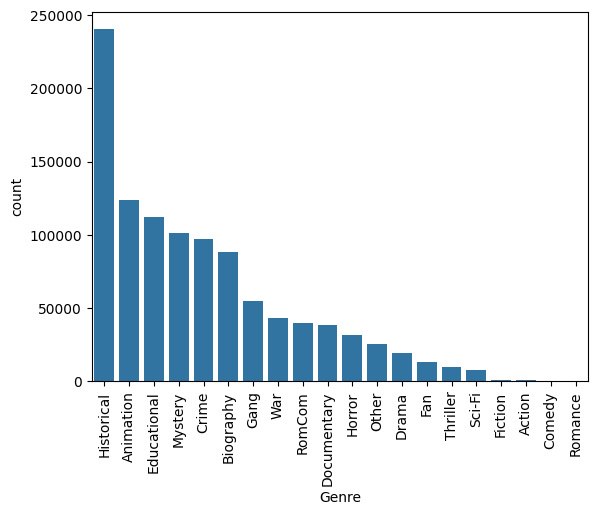

In [14]:
#fig, ax = plt.subplots(1, 2, figsize = (12, 6))

sns.barplot(data = genre_ranking,x = 'Genre', y = 'count')
plt.xticks(rotation = 'vertical')


#sns.barplot(data = most_pop,x = 'Genre', y = 'mean', ax=ax[1])
#plt.xticks(rotation = 'vertical')

plt.show()

- We can see that the most rated genres are :
 1. Historical
 2. Animation
 3. Educational
 4. Mysetery
 5. Crime
 6. Biography
 7. Gang

* The least rated Genres are :
 1. Fiction
 2. Action
 3. Comedy
 4. Romance

In [21]:
genre_ranking.sort_values(by = 'mean', ascending = False)

,count,mean
Genre,,
Horror,31271,4.123181
Educational,111976,3.898523
Historical,240327,3.817948
Action,547,3.749543
Crime,97323,3.728872
Gang,54861,3.680611
Animation,123898,3.581107
Comedy,145,3.558621
Other,25436,3.551541


## The best ratings are received by **Horror** Genre
##  The worst ratings are received by **Romance** Genre

---



In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Cust_Id    1048574 non-null  int64 
 1   Rating     1048574 non-null  int64 
 2   Movie_Id   1048574 non-null  int64 
 3   Genre      1047488 non-null  object
 4   MovieName  1048574 non-null  object
dtypes: int64(3), object(2)
memory usage: 40.0+ MB


In [23]:
movies.isnull().sum()

Cust_Id         0
Rating          0
Movie_Id        0
Genre        1086
MovieName       0
dtype: int64

In [24]:
movies.dropna(inplace = True)

In [25]:
movies.shape

(1047488, 5)

In [26]:
#checking for duplicate values in the dataset
movies.duplicated().sum()

0

In [27]:
f = ['count', 'mean']

In [28]:
dataset_movie_summary = movies.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary
dataset_movie_summary.index  = dataset_movie_summary.index.map(int)
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))
len(drop_movie_list)
print(f'We will be dropping {len(drop_movie_list)} no of movies')

Movie minimum times of review: 1443.0
We will be dropping 168 no of movies


In [29]:
#To create a list of all the inactive users(users who rate less often)
#mean and count of Rating grouped by Customer_ID
#mean is the average rating given by a particular customer, and count is the total no of ratings
dataset_cust_summary = movies.groupby('Cust_Id')['Rating'].agg(f)

dataset_cust_summary
dataset_cust_summary.index = dataset_cust_summary.index.map(int)

cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7), 0)

drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Review count benchmark for customers: {cust_benchmark}')


Review count benchmark for customers: 4.0


In [30]:
print(f'Original Data Shape: {movies.shape}')

Original Data Shape: (1047488, 5)


In [31]:
rec_movies = movies[~movies['Movie_Id'].isin(drop_movie_list)]

rec_movies = movies[~movies['Cust_Id'].isin(drop_cust_list)]

print(f'After trim shape of dataset: {rec_movies.shape}')

After trim shape of dataset: (729816, 5)


In [32]:
print('-Data Examples-')

rec_movies.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet
5,893988,3,1,Action,Dinosaur Planet


* Creating ratings matrix for 'ratings' matix with Rows = userId, Columns = movieId

In [ ]:
df_p = pd.pivot_table(rec_movies, values = 'Rating', index = 'Cust_Id', columns = 'Movie_Id')

print(df_p.shape)

(100598, 240)


In [ ]:
df_p.head()

Movie_Id,1,2,3,4,5,6,7,8,9,10,...,232,233,234,235,236,237,238,239,240,241
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# prompt: command to install the scikit-surprise package

!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162986 sha256=f2379794a5d72a588d37821740ee23b53a8946ede9b2e6ddc520d4a3730ae236
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [34]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [35]:
reader = Reader()

data = Dataset.load_from_df(rec_movies[['Cust_Id', 'Movie_Id', 'Rating']], reader)

svd = SVD()

cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9705  0.9693  0.9686  0.9695  0.0008  
MAE (testset)     0.7642  0.7630  0.7614  0.7629  0.0011  
Fit time          12.56   12.23   12.84   12.54   0.25    
Test time         3.23    3.86    2.70    3.26    0.48    


{'test_rmse': array([0.97053562, 0.9693296 , 0.9685589 ]),
 'test_mae': array([0.76417121, 0.76297917, 0.76140083]),
 'fit_time': (12.56137466430664, 12.234606504440308, 12.837039709091187),
 'test_time': (3.2293689250946045, 3.862548351287842, 2.6983888149261475)}

In [36]:
rec_movies[rec_movies['Rating'] == 5]

,Cust_Id,Rating,Movie_Id,Genre,MovieName
11,2207774,5,1,Action,Dinosaur Planet
19,372233,5,1,Action,Dinosaur Planet
29,662870,5,1,Action,Dinosaur Planet
30,337541,5,1,Action,Dinosaur Planet
34,1209954,5,1,Action,Dinosaur Planet
...,...,...,...,...,...
1048562,2137304,5,241,Horror,North by NorthWest
1048565,2263535,5,241,Horror,North by NorthWest
1048566,1530377,5,241,Horror,North by NorthWest
1048568,1769515,5,241,Horror,North by NorthWest


## To find all the movies rated as 5 star by user with user_Id = 2207774

In [37]:
df_2207774 = rec_movies[(rec_movies['Cust_Id'] == 2207774)	& (rec_movies['Rating'] == 5)]
df_2207774.set_index('Movie_Id')
df = df_2207774['MovieName']

In [38]:
df

11                                  Dinosaur Planet
213381               Aqua Teen Hunger Force: Vol. 1
244795                               Justice League
340451                     Inside the Space Station
542517     MTV: Making the Band 2: Best of Season 1
967177             Voyage to the Planets and Beyond
1011978        Winnie the Pooh: Springtime with Roo
Name: MovieName, dtype: object

In [39]:
df_title = rec_movies[['Movie_Id', 'MovieName', 'Genre']]

In [40]:
df_title.drop_duplicates(inplace = True)

<ipython-input-40-12ccb5bc2156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title.drop_duplicates(inplace = True)


In [41]:
df_title.set_index('Movie_Id', inplace = True)

In [42]:
df_title.head(10)

,MovieName,Genre
Movie_Id,,
1,Dinosaur Planet,Action
2,Isle of Man TT 2004 Review,Comedy
3,Character,Horror
4,Paula Abdul's Get Up & Dance,Romance
5,The Rise and Fall of ECW,Thriller
6,Sick,Fiction
7,8 Man,Thriller
8,What the #$*! Do We Know!?,Animation
9,Class of Nuke 'Em High 2,Thriller


Training an SVD to predict recommendations for for user with User_Id = 2207774

In [43]:
# Create a shallow copy for the movies dataset
user_2207774 = df_title.copy()

user_2207774 = user_2207774.reset_index()

user_2207774 = user_2207774[~user_2207774['Movie_Id'].isin(drop_movie_list)]

data = Dataset.load_from_df(rec_movies[['Cust_Id', 'Movie_Id', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_2207774['Estimate_Score'] = user_2207774['Movie_Id'].apply(lambda x: svd.predict(2207774, x).est)

user_2207774 = user_2207774.drop('Movie_Id', axis = 1)

user_2207774 = user_2207774.sort_values('Estimate_Score', ascending = False)

print(user_2207774.head(10))

                                             MovieName        Genre  \
32                      Aqua Teen Hunger Force: Vol. 1       RomCom   
67                                         Invader Zim       RomCom   
179                                            Scratch         Gang   
31   ABC Primetime: Mel Gibson's The Passion of the...  Educational   
164            Richard Pryor: Live on the Sunset Strip          Fan   
222                         Chappelle's Show: Season 1    Animation   
238                                  Woman of the Year        Drama   
174                                     Reservoir Dogs   Historical   
214                           That '70s Show: Season 1    Biography   
239                                 North by NorthWest       Horror   

     Estimate_Score  
32         5.000000  
67         5.000000  
179        4.965084  
31         4.936454  
164        4.929447  
222        4.926772  
238        4.880661  
174        4.872204  
214        4.730381 

In [44]:
user_2207774

,MovieName,Genre,Estimate_Score
32,Aqua Teen Hunger Force: Vol. 1,RomCom,5.000000
67,Invader Zim,RomCom,5.000000
179,Scratch,Gang,4.965084
31,ABC Primetime: Mel Gibson's The Passion of the...,Educational,4.936454
164,Richard Pryor: Live on the Sunset Strip,Fan,4.929447
...,...,...,...
126,Fatal Beauty,Mystery,3.248153
77,Jingle All the Way,War,3.150095
223,The Cookout,Mystery,3.148364
187,Dead Birds,War,3.141087


In [48]:
pd.set_option('display.max_rows', None)

In [57]:
#List of recommended movies for user 2207774 by Genre with an estimate score > 3
user_2207774.sort_values(by = 'Genre')[user_2207774['Estimate_Score' ]> 3]

<ipython-input-57-9c894d47ac0c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_2207774.sort_values(by = 'Genre')[user_2207774['Estimate_Score' ]> 3]


,MovieName,Genre,Estimate_Score
7,What the #$*! Do We Know!?,Animation,4.110453
96,Mostly Martha,Animation,4.065950
208,Star Trek: Deep Space Nine: Season 5,Animation,4.029988
166,The Chorus,Animation,4.534857
124,Nighthawks,Animation,3.990883
17,Immortal Beloved,Animation,3.975149
70,Maya Lin: A Strong Clear Vision,Animation,4.401740
83,The Powerpuff Girls Movie,Animation,3.902978
56,Richard III,Animation,3.951663
15,Screamers,Animation,3.780646
